# _ELEN90097 Workshop 1 – Modelling and Analysis for AI_

- **Xiufu SUN   1372750**
- **Zhihan XU   1536673**

This workshop is allocated 3 weeks. 

## Topics Covered 
    
* Modelling engineering and physical systems using ODEs
* Solving ODEs numerically
* Identifying system parameters
* Simulation of systems
* Software systems, abstract machines: Finite State Machines and Finite Automata

## Workflow and Assessment 

This subject follows a problem- and project-oriented approach. This learning workflow focuses on solving practical (engineering) problems, which motivates acquiring theoretical (background) knowledge.

### Objectives 
* Use these problems as a motivation to learn the fundamentals covered in lectures.
* Learn how to formulate and solve problems in practice.
* Familiarise yourself with practical software tools.
* Connect theoretical and practical knowledge by doing it yourself.
  
The goal is to gain hands-on experience and learn by doing! Understand how theoretical knowledge discussed in lectures relates to practice. Develop motivation for gaining further theoretical and practical knowledge beyond the subject material.

> __Self-learning__ is one of the most important skills you should acquire as a student. Today, self-learning is much easier than it used to be thanks to many online resources.

### Assessment Process 

1. Follow the procedures described below, perform the given tasks, and answer the workshop questions __in this Python/Jupyter notebook! The resulting notebook will be your Workshop Report!__
2. Submit the workshop report at the announced deadline
3. Demonstrators will conduct a brief oral quiz on your submitted report in the subsequent weeks.
4. Your workshop marks will be based on the report you will submit and oral quiz results (with a heavy weight on the oral component).


> __The goal is to learn__, NOT blindly follow the procedures in the fastest possible way! __Do not simply copy-paste answers (from the Internet, friends, etc.). You can and should use all available resources but only to improve your understanding. If you copy-paste, you may perform poorly on the oral quiz!__

### Notes

* Use the table of contents feature of Jupyter Notebook for your convenience, see View menu above, Table of Contents. You can also turn on section numbers there if you wish.

# Modelling Physical Systems using ODEs

## ODE Basics and Reduction of Order
In engineering, we extensively use [Ordinary Differential Equations (ODEs)](https://en.wikipedia.org/wiki/Ordinary_differential_equation) to describe the evolution of a dynamical system. A *differential equation* is a relationship between a function, $f(x)$, its independent variable, $x$, and any number of its derivatives. The independent variable in dynamical systems is often time $t$. Note that this is a continuous(-time) model. If time (or independent variable) is discretised, we end up with a difference equation instead of a differential equation.

As a general example, consider
$$
\frac{d^{n}f(x)}{dx^{n}} = F\left(x, f(x), \frac{df(x)}{dx}, \frac{d^2f(x)}{dx^2}, \frac{d^3f(x)}{dx^3}, \ldots, \frac{d^{n-1}f(x)}{dx^{n-1}}\right),
$$
where $F$ is an arbitrary function that incorporates one or all of the input arguments, and $n$ is the *order* of the differential equation. This equation is said to be an *$n^{\mathrm{th}}$ order ODE*.

A *general solution* to a differential equation is a $g(x)$ that satisfies the differential equation. Although there are usually many solutions to a differential equation, they are still hard to find. For an ODE of order $n$, a *particular solution* is a $p(x)$ that satisfies the differential equation *and n* explicitly *known values* of the solution, or its derivatives, at certain points. A common set of known values for an ODE solution is the *initial value*. For an ODE of order $n$, the initial value is a known value for the $0^{\mathrm{th}}$ to $(n-1)^{\mathrm{th}}$ derivatives at $x = 0, f(0), f^{(1)}(0), f^{(2)}(0),\ldots, f^{(n-1)}(0)$. In some cases, the initial value is sufficient to find a unique particular solution. Finding a solution to an ODE given an initial value is called the *initial value problem*.

It is useful to convert higher-order ODEs to *first-order* ODEs, which is also known as *reducing the order* of the ODE to first order. To reduce the order of the ODE of a dynamical system, we define the *state* of the system as a function of time, which we can represent as a vector, $S(t)$. In general, the state of a system is a deep concept. In this case,
$$
f^{(n)}(t) = F\left(t, f(t), f^{(1)}(t), f^{(2)}(t), f^{(3)}(t),\ldots, f^{(n-1)}(t)\right).
$$

For initial value problems, it is useful to take the state to be
$$
S(t) =\left[\begin{array}{c}
f(t) \\
f^{(1)}(t) \\
f^{(2)}(t) \\
f^{(3)}(t) \\
\cdots \\
f^{(n-1)}(t)
\end{array}\right].
$$

Then, the derivative of the state is

$$
\frac{dS(t)}{dt} =\!\left[\begin{array}{c}
f^{(1)}(t) \\
f^{(2)}(t) \\
f^{(3)}(t) \\
f^{(4)}(t) \\
\cdots \\
f^{(n)}(t)
\end{array}\right]\!=\!\left[\begin{array}{c}
f^{(1)}(t) \\
f^{(2)}(t) \\
f^{(3)}(t) \\
f^{(4)}(t) \\
\cdots \\
F\left(t, f(t), f^{(1)}(t),\ldots, f^{(n-1)}(t)\right)
\end{array}\right]\!=\!\left[\begin{array}{c}
S_2(t) \\
S_3(t) \\
S_4(t) \\
S_5(t) \\
\cdots \\
F\left(t, S_1(t), S_2(t),\ldots, S_{n-1}(t)\right)
\end{array}\right]\!,
$$
where $S_i(t)$ is the $i^{\mathrm{th}}$ element of $S(t)$. With the state written in this way, $\frac{dS(t)}{dt}$ can be written using only $S(t)$ (i.e., no $f(t)$) or its derivatives. In particular, $\frac{dS(t)}{dt} = {\mathcal{F}}(t,S(t))$, where ${\mathcal{F}}$ is a function that appropriately assembles the vector describing the derivative of the state. This equation is in the form of a first-order differential equation in $S$. Essentially, what we have done is turn an $n^{\mathrm{th}}$ order ODE into $n$ first order ODEs that are *coupled* together, meaning they share the same terms.

Note that several notations are commonly used for the derivative of $f(t)$ such as $f^{\prime}(t), f^{(1)}(t), \frac{df(t)}{dt}$, and $\dot{f}$.

You can [read further about this topic here.](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter22.00-ODE-Initial-Value-Problems.html)

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
m = 1.  # particle's mass
k = 0.5  # drag coefficient
g = 9.81  # gravity acceleration

# The initial position is (0, 0).
v0 = np.zeros(4)
# The initial speed vector is oriented
# to the top right.
v0[2] = 4.
v0[3] = 8.

## Example: Simple Projectile Motion

<img src="./img/projectiles.png" alt="Projectile image" style="width: 300px;margin: auto"/>

We horizontally throw a mass in a 2D setting where we only care about location $x$ and height $y$. Let $u = (x,y)$ encode the 2D position of our particle with mass $m$. This particle is subject to two forces: gravity $mg = -9.81 m$ and air drag $F = -ku'$. This last term is a simplifying assumption, which depends on the particle's speed and is only valid at low speeds. 

Remember *Newton's second law of motion* from classical mechanics. This law states that, in an inertial reference frame, the mass multiplied by the acceleration of the particle is equal to the sum of all forces applied to that particle. You can show all forces acting on a particle in a free-body diagram. Here, we have:

$$m \cdot u'' = F + (0,1)mg,$$
which is simplified for convenience, and immediately yields a second-order ODE:

$$u'' = -\frac{k}{m} u' - (0,1) g.$$

Next, we reduce order and transform it into a single-order system of ODEs, with the state defined as $v=(u, u')$:

$$v' = (u', u'') = (u',  [-\frac{k}{m} x', -\frac{k}{m}y' - g]).$$

The last term can be expressed as a function of the state $v$ only.

You may have solved these types of simple ODEs by hand in mathematics subjects before. In most cases, however, the ODEs you will encounter in real life will not be solvable by hand! Then, you need to either simulate them or solve them numerically. Let's solve this ODE using the well-known Python library [SciPy](https://docs.scipy.org/doc/scipy/tutorial/integrate.html) to simulate it numerically.

**Note** that there are many DE solvers. For example, [diffeqpy](https://github.com/SciML/diffeqpy) is a nice project that uses Julia libraries (known for their DE-solving capabilities).

In [3]:
# the function to integrate
def f(t, v, k, m, g):
    # v has four components: v=[u, u']. Note u has two components itself, so 2x2=4!
    u, udot = v[:2], v[2:]
    # We compute the second derivative u'' of u in a fancy shortcut way
    udotdot = -k / m * udot   # air drag affects both x and y
    udotdot[1] -= g           # gravity only affects y in reverse direction  
    # We return v'=[u', u''].
    return np.r_[udot, udotdot]  # concatenate, https://numpy.org/devdocs/reference/generated/numpy.r_.html

(0.0, 3.0)

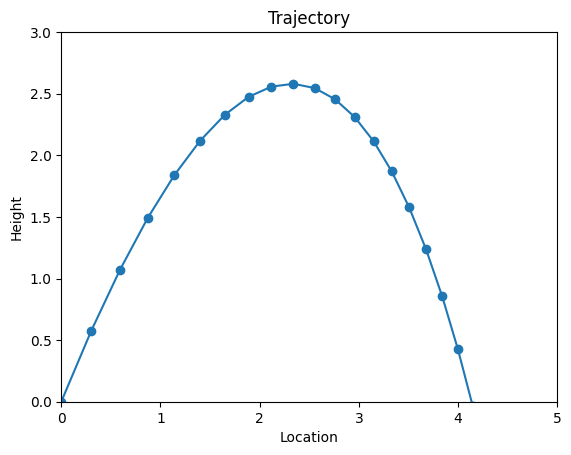

In [4]:
# We want to evaluate the system between t=0 and t=3.
tspan = [0, 3]
t_pts = np.linspace(tspan[0],tspan[1], 40)  # 40 points 

#v = spi.odeint(f, v0, t, args=(k,))
solution = spi.solve_ivp(f, tspan, v0, args=(k, m, g), t_eval=t_pts, dense_output=True, method="RK45")
#solution.y

# We plot the particle's trajectory.
fig, ax = plt.subplots()
ax.plot(solution.y[0,:], solution.y[1,:], 'o-')
ax.set(xlabel='Location', ylabel='Height', title='Trajectory')
ax.set_xlim(0, 5)
ax.set_ylim(0, 3)
# fig.savefig("trajectory.png")  # you can save the figure if you wish

In [5]:
solution

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  7.692e-02 ...  2.923e+00  3.000e+00]
        y: [[ 0.000e+00  3.019e-01 ...  6.145e+00  6.215e+00]
            [ 0.000e+00  5.750e-01 ... -1.492e+01 -1.595e+01]
            [ 4.000e+00  3.849e+00 ...  9.275e-01  8.925e-01]
            [ 8.000e+00  6.958e+00 ... -1.322e+01 -1.346e+01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x0000025DA4A23310>
 t_events: None
 y_events: None
     nfev: 44
     njev: 0
      nlu: 0

**Let's save our results!** There are many ways of doing it in Python, see [how to save Numpy arrays to csv files](https://www.geeksforgeeks.org/convert-numpy-array-into-csv-file/). Python also has [built-in support for csv files](https://docs.python.org/library/csv.html).

After saving the results, which are the state variables over time (4 variables, given time steps), to a universal csv (comma separated value) file, you can open it in Excel or import it to Matlab.

In [6]:
# Let's save the results

print(solution.y.shape)
# solnarray = np.array(solution.y) # solution.y is already a numpy array!
np.savetxt("projectile.csv", solution.y, delimiter = ",")

(4, 40)


## Question: Solving ODEs using Trajector Example

Use the projectile motion above as an example to explore how to solve initial value problems in Python. Specifically,
1. Write the ODEs in matrix form by using state definition $v=[x, y, x', y']$.
2. Change parameters of the model $(m, g, k)$ and observe their effects.
3. Change initial conditions (location, speed), i.e. state at time $t=0$ and observe how solutions change.
4. Practice saving your solutions in CSV format.
5. Implement your simple solver using Euler's method.
6. Try different [solvers](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) including your own and parameters (e.g. number of evaluation points). Discuss (if you see) any differences.

Hint: do not try to be exhaustive and spend too much time on these tasks.

**Answer as text here**

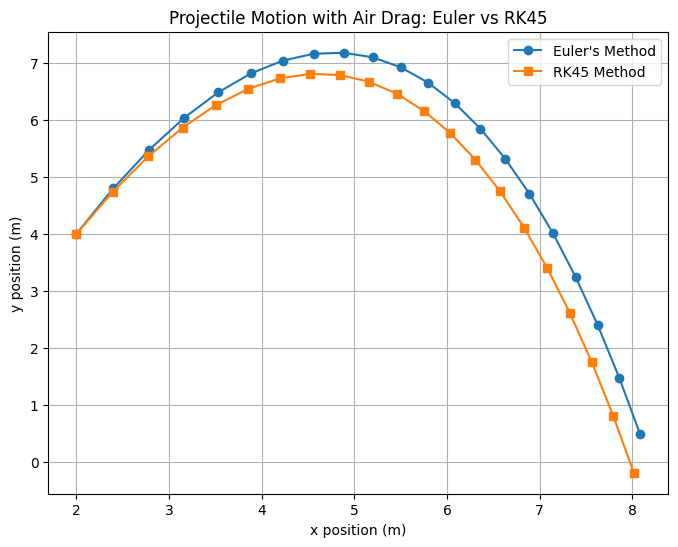

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameter definitions
m = 1.0  # Mass (kg)
k = 0.3  # Drag coefficient
g = 9.81  # Gravitational acceleration (m/s^2)

# Initial conditions
x0, y0 = 2.0, 4.0  # Initial position (m)
vx0, vy0 = 4.0, 8.0  # Initial velocity (m/s)

# Time parameters
t0, t_end = 0, 2  # Time range (seconds)
h = 0.1  # Time step (seconds)
N = int((t_end - t0) / h)  # Number of steps

# Initialize arrays to store results
t_vals = np.linspace(t0, t_end, N+1)  # Time values
x_vals = np.zeros(N+1)  # x position values
y_vals = np.zeros(N+1)  # y position values
vx_vals = np.zeros(N+1)  # x velocity values
vy_vals = np.zeros(N+1)  # y velocity values

# Set initial values
x_vals[0], y_vals[0] = x0, y0
vx_vals[0], vy_vals[0] = vx0, vy0

# Euler's method to solve the equations of motion
for i in range(N):
    vx = vx_vals[i]  # Current velocity in x-direction
    vy = vy_vals[i]  # Current velocity in y-direction

    ax = -k / m * vx  # Acceleration in x due to drag
    ay = -k / m * vy - g  # Acceleration in y due to drag and gravity

    # Update velocity using Euler's method
    vx_vals[i+1] = vx + h * ax
    vy_vals[i+1] = vy + h * ay
    
    # Update position using Euler's method
    x_vals[i+1] = x_vals[i] + h * vx
    y_vals[i+1] = y_vals[i] + h * vy

# Define the system of differential equations
def f(t, v):
    x, y, vx, vy = v
    ax = -k / m * vx  # Acceleration in x due to drag
    ay = -k / m * vy - g  # Acceleration in y due to drag and gravity
    return [vx, vy, ax, ay]

# Solve the system using the RK45 method
sol = solve_ivp(f, [t0, t_end], [x0, y0, vx0, vy0], t_eval=t_vals, method="RK45")

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, marker='o', linestyle='-', label="Euler's Method")  # Euler method results
plt.plot(sol.y[0], sol.y[1], marker='s', linestyle='-', label="RK45 Method")  # RK45 method results
plt.xlabel("x position (m)")
plt.ylabel("y position (m)")
plt.title("Projectile Motion with Air Drag: Euler vs RK45")
plt.legend()
plt.grid()
plt.show()


RK45 is more accurate than Euler's method. This conclusion can be reached by analyzing the errors at each step.

Euler's method: $y(x) \approx y(x_i) + y'(x_i)(x - x_i)$
It uses only the first two terms of Taylor's formula. Hence, its error is $O(h^2)$.
However, the error of RK45 is $O(h^5)$, more accurate than Euler's method.

Additionally, in order to make the result more accurate, the step can be shortened. But that adds to the computation.

## Question: Solve an ODE with step input

Consider this set of ODEs with the initial conditions and step input function given. Solve it numerically using [scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) as you have done before. Note that you may need to use a different approach here due to discontinuity in the function $u(t)$.

$2 \; \frac{dx(t)}{dt} = -x(t) + u(t)$

$5 \; \frac{dy(t)}{dt} = -y(t) + x(t)$

$u = 2 \, S(t-5)$

$x(0) = 0$

$y(0) = 0$

where $S(t-5)$ is a step function that changes from zero to one at $t=5$. When it is multiplied by two, it changes from zero to two at that same time, $t=5$.

_**Hint:** the trick here is to define the step function $u$ and include it in the system of ODEs._

**Further Exploration:** You can use ```u(t) = 2 * np.random.random_sample() ``` for more fun!

**Answer as text here**

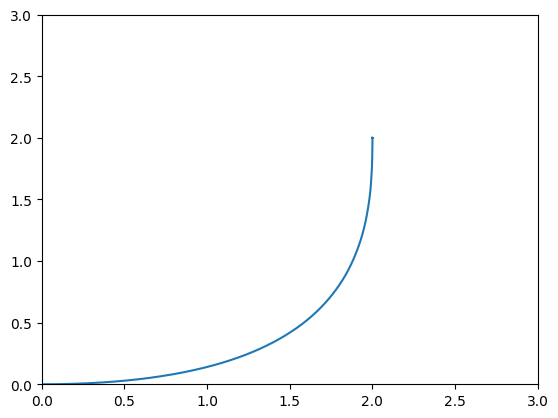

In [1]:
''' Answer as code here '''
import numpy as np 
import scipy.integrate as spi 
import matplotlib.pyplot as plt 

def step_function(x):
    return np.where(x < 0, 0, 1)

w_dot = [0, 0]

def func(t, w):
    w_dot[0] = -0.5 * w[0] + step_function(t-5)
    w_dot[1] = -0.2 * (w[1] - w[0])
    return w_dot

N = 100
w0 = [0,0]
t_span = [0, N]
t_pts = np.linspace(0, N, 10000)

solution = spi.solve_ivp(func, t_span, w0, t_eval= t_pts, method='RK45')

fig, ax = plt.subplots()
ax.plot(solution.y[0,:], solution.y[1,:], '-')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.show()

## Question: Solve and Simulate a Simple RLC Circuit

<img src="./img/RLC_circuit.png" alt="RLC circuit" style="width:400px;margin: auto"/>
You probably have seen this simple RLC circuit before. It can be solved using a circuit simulator such as SPICE. Alternatively, you can use [Matlab/Simulink](https://au.mathworks.com/help/simulink/slref/model-series-rlc-circuit.html) to [model and solve](https://microcontrollerslab.com/solving-rlc-circuit-matlab/) it. To save time, we will skip the underlying KVL/KCL (Kirchoff Voltage and Current Laws) and provide the reduced first-order set of ODEs below:

<img src="./img/RLC_ode.png" alt="RLC ODEs" style="width: 500px;margin: auto"/>

Here the state vector is $[V_C, V_L, V_R, I_L, I_{AC}]$. It is possible to use a more optimise it if you wish by removing $I_{AC}$.

1. Simulate this circuit in your favourite circuit simulator (or even in [Matlab](https://au.mathworks.com/help/simulink/slref/model-series-rlc-circuit.html)) after choosing **your own** reasonable values for $R, L, C$. Provide the current and voltages as outputs.
2. Solve the ODEs in Python numerically as above and check your results against the "ground truth" from your simulation in Step 1.
3. Try different [solvers](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) and check if you see any difference (should be similar).

Note that in many cases when real-world data is not available, system simulation provides synthetic but useful data, e.g. for machine learning.

**Answer as text here**

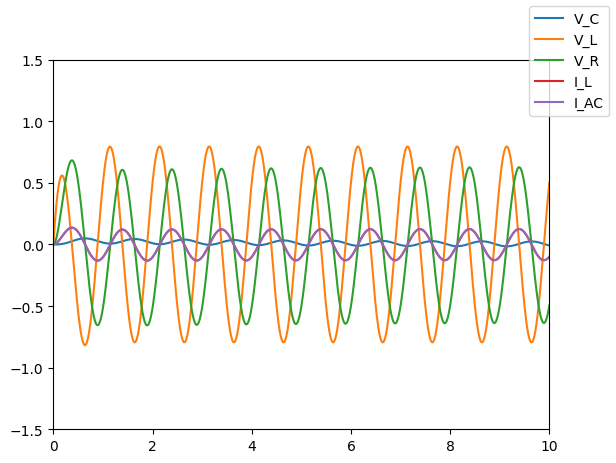

In [10]:
''' Answer as code here '''
import numpy as np 
import scipy.integrate as spi 
import matplotlib.pyplot as plt 

R = 5
L = 1
C = 1
Amptitude = 1
Freq = 1

y_dot = [0,0,0,0,0]

def func(t, y, R, L, C):
    # Vac = Amptitude * np.sin(t)
    y_dot[0] = y[3] / C # V_C
    y_dot[3] = y[1] / L # I_L
    y_dot[2] = R * y_dot[3] # V_R
    y_dot[4] = y_dot[3] # I_AC
    y_dot[1] = 2 * np.pi * Freq * Amptitude * np.cos(2 * np.pi * Freq * t) - y_dot[0] - y_dot[2] # V_L
    # print(y_dot)
    return y_dot

N = 10
y0 = [0,0,0,0,0]
t_span = [0, N]
t_pts = np.linspace(0, N, 1000)

solution = spi.solve_ivp(func, t_span, y0, args=(R, L, C), t_eval= t_pts, method='RK45')

fig, ax = plt.subplots()
ax.plot(t_pts, solution.y[0,:], '-', label='V_C') 
ax.plot(t_pts, solution.y[1,:], '-', label='V_L')
ax.plot(t_pts, solution.y[2,:], '-', label='V_R')
ax.plot(t_pts, solution.y[3,:], '-', label='I_L')
ax.plot(t_pts, solution.y[4,:], '-', label='I_AC')

lines =[]
labels =[]
for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
fig.legend(lines, labels, loc='upper right')

ax.set_xlim(0, N)
ax.set_ylim(-1.5 * Amptitude, 1.5 * Amptitude)
plt.show()
# fig.savefig("RLC_example.png")

# System Identification using Least Squares Regression

Given a set of independent data points $x_i$ and dependent data points $y_i, i = 1, \ldots, m$, we would like to find an *estimation function*, 
$\hat{y}(x)$, that describes the data as well as possible. In the least squares regression, the estimation function must be a linear combination of *basis functions*, $f_i(x)$. That is, the estimation function must be of the form $\hat{y}(x) = \sum_{i = 1}^n {\alpha}_i f_i(x)$
The scalars ${\alpha}_i$ are the *parameters* of the estimation function, and each basis function must be linearly independent of the others.

The goal of **least squares regression** is to find the parameters of the estimation function that minimize the *total squared error*, $E$, defined by $E = \sum_{i=1}^m (\hat{y} - y_i)^2$. The *residuals* are defined as $e_i = (\hat{y} - y_i)$. If $e$ is the vector containing all the individual errors, then we are also trying to minimize $E = \|{e}\|_{2}^{2}$, which is the $L_2$ norm.

If we assume **noisy measurements** at each data point, $x_i$, this gives us the following system of equations:

$$
\begin{eqnarray}
&&\hat{y}(x_1) = {\alpha}_1 f_1(x_1) + {\alpha}_2 f_2(x_1) + \cdots + {\alpha}_n f_n(x_1), \\
&&\hat{y}(x_2) = {\alpha}_1 f_1(x_2) + {\alpha}_2 f_2(x_2) + \cdots + {\alpha}_n f_n(x_2), \\
&&\qquad\qquad\qquad\qquad\qquad \cdots \\
&&\hat{y}(x_m) = {\alpha}_1 f_1(x_m) + {\alpha}_2 f_2(x_m) + \cdots + {\alpha}_n f_n(x_m).
\end{eqnarray}
$$

We can write the *total squared error* as
$$
E = \sum_{i=1}^m e_i^2 = \sum_{i=1}^m (\hat{y}(x_i) - y_i)^2 = \sum_{i=1}^m \left(\sum_{j=1}^n {\alpha}_j f_j(x_i) - y_i\right)^2.
$$

Minimising $E$ with respect to parameters $\alpha$ (using basic convex optimisation), we obtain for each row $k$:
$$
\sum_{j=1}^n {\alpha}_j \sum_{i=1}^m f_j(x_i)f_k(x_i) = \sum_{i=1}^m y_i f_k(x_i).
$$
Rearranging the terms, we have 
$$ \sum_{i=1}^m \left( \sum_{j=1}^n {\alpha}_j  f_j(x_i) \right ) f_k(x_i) = \sum_{i=1}^m y_i f_k(x_i), \; k=1,\ldots,m $$

Let us define the matrix 
$$F =  \left[\begin{array}{c}  
f_1(x_1), f_1(x_2), \ldots, f_1(x_m) \\ 
f_2(x_1), f_2(x_2), \ldots, f_2(x_m) \\
 \cdots \ \cdots \\
f_m(x_1), f_m(x_2), \ldots, f_m(x_m)
\end{array}\right]
$$

Then, the equations can be written for each row $k$ as $ F_{k,*} \, F_{*,k} \, \alpha = F_{k,*} \, y$. Thus, we obtain the matrix equation
$$ F F^T \alpha = F y.$$

Solving this matrix equation (either by inverting $F F^T$ or posing it as an optimisation problem), we find the parameter vector $\alpha$ and achieve our goal!

You can read further in this nice chapter on [Least Squares Regression using Python](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter16.00-Least-Squares-Regression.html).

## Example: Identifying Projectile Mass

Let us imagine (as a simple hypothetical example) that we have a measurement device that records the position and acceleration of our projectile in the projectile trajectory example above. If we could measure these perfectly and we know the air drag constant $k$, all we would need is a single perfect data point to find the mass $m$ of the projectile based on the equation $[x'', y'']= -\frac{k}{m}[x',y']-[0, 1]g.$ However, in real life measurements are imperfect so our data points will be noisy. Because our data comes from a ``perfect" model, we add a bit of noise to represent measurement errors or imprecision. Let's try!

In [2]:
from numpy.random import default_rng
from scipy.optimize import least_squares

rng = default_rng(65988165)
error = 0.1 * rng.standard_normal((4,40))

# generate imperfect measurements from previous solution
vx = solution.y[2]+error[0,:]
vy = solution.y[3]+error[1,:]
ax = -(k/m)*vx + +error[2,:]
ay = -(k/m)*vy +error[3,:] # that includes the constant g as simplification

# Initial parameter estimate
km0 = np.array([2])

#print(vx.shape, vy.shape, ax.shape, ay.shape, km0.shape)

In [3]:
# We define a function for computing residuals and the initial estimate of parameter k/m

def func(km, vx, vy, ax, ay):
    return (ax + km[0]*vx)**2+(ay + km[0]*vy)**2

#a = func(km0, vx, vy, ax, ay)
#a
est_lsq = least_squares(func, km0, args=(vx, vy, ax, ay))
est_lsq

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [ 7.073e-03  9.189e-03 ...  4.693e-03  1.623e-02]
           x: [ 6.685e-01]
        cost: 0.01285379741785545
         jac: [[-1.250e+00]
               [-2.572e-01]
               ...
               [-1.145e+00]
               [-2.837e+00]]
        grad: [ 2.298e-04]
  optimality: 0.000229793587134014
 active_mask: [ 0.000e+00]
        nfev: 29
        njev: 29

In [4]:
print('estimated value is',est_lsq.x)
print('real value is',k/m)
print('estimation error due to noise',est_lsq.x-k/m)

estimated value is [0.66850636]
real value is 0.6666666666666666
estimation error due to noise [0.00183969]


## Example: Identify Parameters of a Pole-Cart Object

<img src="./img/cart_pole.jpg" alt="Cart Pole Environment" style="width:400px;margin: auto"/>

In this example, we will use MuJoCo System Identification [(mujoco-sysid)](https://github.com/lvjonok/mujoco-sysid) Python module that is designed to perform system identification using the [MuJoCo physics engine](https://github.com/google-deepmind/mujoco). 

There is extensive [documentation on MuJoCo](https://mujoco.readthedocs.io/en/stable/overview.html), which comes with native [Python bindings you can read about](https://mujoco.readthedocs.io/en/stable/python.html). You can also find [a nice tutorial](https://colab.research.google.com/github/google-deepmind/mujoco/blob/main/python/tutorial.ipynb) on there. Here is another nice [notebook on least squares](https://colab.research.google.com/github/google-deepmind/mujoco/blob/main/python/least_squares.ipynb).

First, let's have a look at the MuJoCo implementation of the famous cart-pole model.

In [6]:
import mujoco
sim_model = mujoco.MjModel.from_xml_path("./files/cartmodel.xml")
sim_data = mujoco.MjData(sim_model)

In [7]:
# You can edit model properties directly on the XML file or access them via Python interface

# This is a trick to list objects in the model
try:
  sim_model.body()
except KeyError as e:
  print(e)

"Invalid name ''. Valid names: ['cart', 'pole', 'world']"


In [8]:
# let's look at the properties of the cart
sim_model.body("cart")

<_MjModelBodyViews
  dofadr: array([0], dtype=int32)
  dofnum: array([1], dtype=int32)
  geomadr: array([0], dtype=int32)
  geomnum: array([1], dtype=int32)
  id: 1
  inertia: array([1.e-06, 1.e-06, 1.e-06])
  invweight0: array([0.66666133, 0.        ])
  ipos: array([0., 0., 0.])
  iquat: array([1., 0., 0., 0.])
  jntadr: array([0], dtype=int32)
  jntnum: array([1], dtype=int32)
  mass: array([0.5])
  mocapid: array([-1], dtype=int32)
  name: 'cart'
  parentid: array([0], dtype=int32)
  pos: array([0., 0., 1.])
  quat: array([1., 0., 0., 0.])
  rootid: array([1], dtype=int32)
  sameframe: array([1], dtype=uint8)
  simple: array([0], dtype=uint8)
  subtreemass: array([0.6])
  user: array([], dtype=float64)
  weldid: array([1], dtype=int32)
>

In [9]:
# we can change the properties of the cart, for example mass as below
sim_model.body("cart").mass=np.array([1.0])

Now, we gather data by randomly applying force to the cart. This type of "random walk" is useful in system identification as it allows us to explore the trajectory space randomly (instead of sticking to a subset of the environment).

In [10]:
# random forcing and measure data

# Reset data, set initial pose.
mujoco.mj_resetData(sim_model, sim_data)

identification_data = {
    "qhist": [],
    "vhist": [],
    "dvhist": [],
    "uhist": [],
}

for i in range(3000):
    identification_data["qhist"].append(sim_data.qpos.copy())
    identification_data["vhist"].append(sim_data.qvel.copy())

    u = np.random.randn(1) * 10
    identification_data["uhist"].append(u)

    sim_data.ctrl = u
    mujoco.mj_step(sim_model, sim_data)
    identification_data["dvhist"].append(sim_data.qacc.copy())

identification_data["qhist"] = np.array(identification_data["qhist"])
identification_data["vhist"] = np.array(identification_data["vhist"])
identification_data["dvhist"] = np.array(identification_data["dvhist"])
identification_data["uhist"] = np.array(identification_data["uhist"])

### Cart Pole Model Equations and Parameters

Once we have gathered data, we can formulate the model-based system identification problem. A specific model of the cart pole system dynamics is given by:
$$
\begin{equation}
\begin{cases}
\left(M+m\right){\ddot {q}_1}-m L \ddot{q}_2 \cos q_2 +m L \dot{q}_2^{2}\sin q_2 = u \\
L \ddot{q}_2- g\sin q_2 =\ddot{q}_1 \cos q_2 \\
\end{cases}
\end{equation}
$$

where $q_2$ is the angle of the pendulum measured from the upper equilibrium and $q_1$ is the cart's position.

The notable property of any rigid body mechanical system  (cart-pole in particular) is the inverse dynamics [can be parametrised linearly to the set of constant inertial parameters](https://journals.sagepub.com/doi/abs/10.1177/027836498600500306?journalCode=ijra), indeed one may introduce the parameters $\boldsymbol{\theta} = [M+m, mL, L]$ and derive linearly parametrised inverse dynamics in so-called regressor form:

$$
\begin{bmatrix}
\ddot{q}_1 & - \ddot{q}_2 \cos \theta + \dot{q}_2^2 \sin q_2 & 0 \\
0 & 0 & \ddot{q}_2 \\
\end{bmatrix} \begin{bmatrix}
M + m \\
mL \\
L
\end{bmatrix} = \begin{bmatrix}
u \\
g \sin q_2 + \ddot{q}_1 \cos q_2 \\
\end{bmatrix}
$$

For given measurements of $\mathbf{q}(t), \dot{\mathbf{q}}(t), \ddot{\mathbf{q}}(t), \mathbf{u}(t)$ the above is the formulated as simple linear equation:
$$
\mathbf{A}(t)\boldsymbol{\theta} = \mathbf{b}(t)
$$

Now given the sequence of time samples (measured data above), we may build the $\mathbf{A}, \mathbf{b}$ and solve the associated linear least squares problem (possibly with bounds on parameters).

In [11]:
# formulate regressor
A = []
b = []

g = 9.81

for i in range(1, len(identification_data["qhist"])):
    q = identification_data["qhist"][i]
    v = identification_data["vhist"][i]
    dv = identification_data["dvhist"][i]
    u = identification_data["uhist"][i]

    regressor = [
        [dv[0], -dv[1] * np.cos(q[1]) + v[1] ** 2 * np.sin(q[1]), 0],
        [0, 0, dv[1]],
    ]

    A.extend(regressor)
    b.extend(
        [
            u[0],
            dv[0] * np.cos(q[1]) + g * np.sin(q[1]),
        ]
    )

A = np.array(A)
b = np.array(b)

Now, we solve the simple least squares problem to get the parameter estimates using MuJoCo's built-in [least-squares implementation](https://mujoco.readthedocs.io/en/stable/python.html#minimize).

In [12]:
import mujoco.minimize as minimize


def residual(x):
    # Ensure x is 2D for consistent processing
    if x.ndim == 1:
        x = x[:, np.newaxis]

    # Compute residuals using matrix operations
    return A @ x - b[:, np.newaxis]


result = minimize.least_squares(
    np.array((0.0, 0.0, 0.0)),
    residual,
)

identified_parameters = result[0]

newL = identified_parameters[2]
new_poleM = identified_parameters[1] / newL
new_cartM = identified_parameters[0] - new_poleM

identified_parameters

iter: 0    y: 3.087e+05  log10mu: -inf  ratio: 1        dx: 1.2      reduction: 2.9e+05
iter: 1    y: 1.711e+04  log10mu: -inf  ratio: 7.3e+06  dx: 8.1e-12  reduction: 3.6e-12
Terminated after 1 iterations: norm(dx) < tol. y: 1.711e+04, Residual evals: 9


array([1.1       , 0.05      , 0.46284371])

In [13]:
print("Total mass M+m = ",identified_parameters[0])
print("Cart mass M =", new_cartM)
print("Pole mass m =", new_poleM)
print("Pole length L =",newL)   # in xml file geom size 0.45

Total mass M+m =  1.0999999999925338
Cart mass M = 0.991972173001752
Pole mass m = 0.1080278269907818
Pole length L = 0.46284370786289475


You can rerun this after changing some parameters such as cart mass or pole mass/length. **Try it yourself!**

## Question: System Identification Mini Project

Now that you have seen system identification examples and libraries for deploying the well-known least square method, it is time to try things yourself!

The tasks are:
1. Choose **one** dynamical system with a known model. It can be a simplified model, e.g. linearised. (*Note: derivation of a new model is outside scope!*)
2. Generate an observation dataset from the dynamical system recording relevant variable values for a given set of fixed system parameters. This can be done either by (a) solving the ODEs of the model as above, (b) using a simulator, or (c) an environment like Gymnasium or MuJoCo.
3. Choose one or more system parameters and assume they are unknown. Then, use the **Least Squares method** to identify these parameters using the library of your choice, e.g. SciPy.
4. Compute the error between actual and estimated values, e.g. using MSE or MAE (Mean Square or Absolute Error).

Possible Dynamical Systems from different domains
* *\[Mechanical\]* Pendulum (possibly with friction and damping). There are multiple resources online such as relevant [equations](https://www.physicsandstuffiguess.com/pendulums/pendulumFriction.html) and [background](https://math.libretexts.org/Bookshelves/Scientific_Computing_Simulations_and_Modeling/Scientific_Computing_(Chasnov)/II%3A_Dynamical_Systems_and_Chaos/11%3A_The_Damped%2C_Driven_Pendulum), a [tutorial](https://ctms.engin.umich.edu/CTMS/index.php?aux=Activities_Pendulum#4), an [example project](https://www.philipzucker.com/system-identification-of-a-pendulum-with-scikit-learn/) and [a gym environment](https://gymnasium.farama.org/environments/classic_control/pendulum/).
* *\[Electrical/Energy\]* [Resistor-capacitor (RC) model of buildings](https://buildingenergygeeks.org/a-simple-rc-model-python.html) from an energy perspective.
* *\[Electrical\]* Identification of an element, e.g. resistance in an (RLC) circuit from measurements. You can use the RLC circuit model above as a starting point.
* *\[Robotics/Mechanical\]* There are many options in [Gymnasium classical control](https://gymnasium.farama.org/environments/classic_control/) and [MuJoCo Menagerie](https://github.com/google-deepmind/mujoco_menagerie). You can choose any of these (as long as it is simple enough and you find the ODE model).
* *\[Other\]* If you have expertise in another field (e.g. Chemistry) and have an ODE model of a dynamical system, you can use it.

**Requirement:** Please first check your choice of dynamical system with your demonstrator and lecturer!


**Answer as text here**

estimated value is [4.96007783]
real value is 5
estimation error due to noise [-0.03992217]


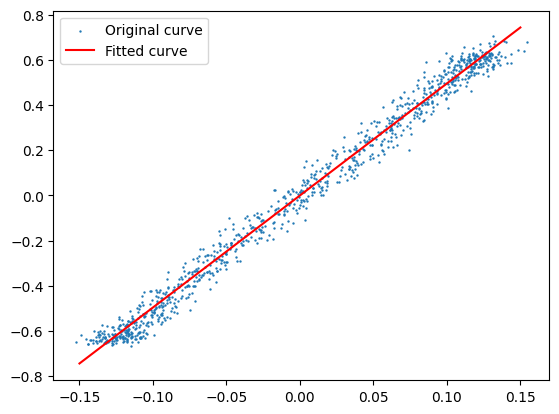

In [14]:
''' Answer as code here '''
from numpy.random import default_rng
from scipy.optimize import least_squares
import numpy as np 
import scipy.integrate as spi 
import matplotlib.pyplot as plt 

R = 5
L = 1
C = 1
Amptitude = 1
Freq = 1

y_dot = [0,0,0,0,0]

def func(t, y, R, L, C):
    # Vac = Amptitude * np.sin(t)
    y_dot[0] = y[3] / C # V_C
    y_dot[3] = y[1] / L # I_L
    y_dot[2] = R * y_dot[3] # V_R
    y_dot[4] = y_dot[3] # I_AC
    y_dot[1] = 2 * np.pi * Freq * Amptitude * np.cos(2 * np.pi * Freq * t) - y_dot[0] - y_dot[2] # V_L
    # print(y_dot)
    return y_dot

N = 10
y0 = [0,0,0,0,0]
t_span = [0, N]
t_pts = np.linspace(0, N, 1000)

solution = spi.solve_ivp(func, t_span, y0, args=(R, L, C), t_eval= t_pts, method='RK45')

rng = default_rng(65988165)
error = 0.01 * rng.standard_normal([2,len(t_pts)])

# generate imperfect measurements from previous solution
vr = solution.y[2] + error[0, :]
i = solution.y[4] + error[1, :]
# Initial parameter estimate
r0 = np.array([5])
#print(vr.shape, i.shape, vr0.shape)

def func(r, vr, i):
   return (r * i - vr)**2

#a
est_lsq = least_squares(func, r0, args=(vr, i))
print('estimated value is', est_lsq.x)
print('real value is', R)
print('estimation error due to noise', est_lsq.x - R)

plt.figure
plt.scatter(i, vr, label = 'Original curve', s=0.5)
plt.plot([-0.15, 0.15],est_lsq.x * [-0.15, 0.15],'-r', label ='Fitted curve')
plt.legend()
plt.show()

# Abstract Computing Machines

<img src="./img/Automata_theory.png" alt="Automata Theory" style="width:300px;margin: auto"/>

In the computing world, an **abstract machine** is a theoretical construct and an umbrella model for computing systems. Abstract machines are mathematical objects, so they are expected to perform correctly and independent of hardware. Abstract machines are "machines" because they allow step-by-step execution of programmes; they are "abstract" because they ignore many aspects of actual physical hardware. Therefore, they are fundamental to the field of computational complexity theory, such as finite state machines, automata, and Turing machines.

It is important to note a crucially important difference between abstract machines of the computing world and physical systems. Abstract machines are (up to some extent) not bound by the rules of physics. Therefore, they are different from mechanical, chemical, or electrical engineering systems. Maybe unsurprisingly, they are not easy to model using ODEs which work very well in modelling physical phenomena.

## Example: Finite State Machine (FSM)

Let us make things a bit more concrete by looking at [deterministic finite automata](https://en.wikipedia.org/wiki/Deterministic_finite_automaton), which you may already know well as **[Finite State Machine (FSM)](https://softwaredominos.com/home/software-engineering-and-computer-science/finite-state-machines-an-introduction-to-fsms-and-their-role-in-computer-science/)**.

**FSM**s are widely used from [communication protocols](http://www.tcpipguide.com/free/t_TCPOperationalOverviewandtheTCPFiniteStateMachineF-2.htm) to [industrial automation](https://www.crossmuller.com.au/news/the-benefits-of-finite-state-machines-in-industrial-automation/). 
Here are a few examples from [language processing](https://python-course.eu/applications-python/finite-state-machine.php), [embedded systems](https://users.ece.utexas.edu/~valvano/Volume1/E-Book/C10_Interactives.htm), and [other applications](https://www.electronics-tutorial.net/finite-state-machines/FSM-Applications/). Here is another good [free book chapter](https://eng.libretexts.org/Under_Construction/Book%3A_Discrete_Structures/09%3A_Finite-State_Automata) on this topic.

There are many FSM implementations in Python. We choose [automata](https://github.com/caleb531/automata) for its simplicity. Very useful information can be found at the homepage of the [book Algorithms by Jeff Erickson](https://jeffe.cs.illinois.edu/teaching/algorithms/#models).

In [15]:
from automata.fa.dfa import DFA

# DFA which matches all binary strings ending in an odd number of '1's
my_dfa = DFA(
    states={'q0', 'q1', 'q2'},
    input_symbols={'0', '1'},
    transitions={
        'q0': {'0': 'q0', '1': 'q1'},
        'q1': {'0': 'q0', '1': 'q2'},
        'q2': {'0': 'q2', '1': 'q1'}
    },
    initial_state='q0',
    final_states={'q1'}
)

# a helper function that takes in an automaton and input strings, printing whether the input was accepted or rejected
def read_user_input(my_automaton, input_sequence):
    if my_automaton.accepts_input(input_sequence):
        print("Accepted")
    else:
        print("Rejected")

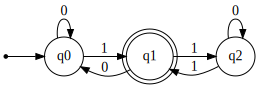

In [ ]:
# The visualisation is unimportant, don't worry if you cannot make it work due to package problems!

# pip install 'automata-lib[visual]'
# let's visualise this FSM
my_dfa.show_diagram()

A sequence is accepted by the FSM (DFA) if it is a valid input sequence and (starting from the initial state) it ends in a legitimate final state.

In [ ]:
read_user_input(my_dfa,"0111101")

Accepted


In [ ]:
read_user_input(my_dfa,"1101010")

Rejected


**Modify this FSM to your liking and try different inputs!**

## Example: Cellular Automata

<img src="./img/seashell.jpg" alt="Seashell" style="width:300px;margin: auto"/>

[Cellular automata](https://en.wikipedia.org/wiki/Cellular_automaton) are discrete dynamical systems evolving on a grid of cells. These cells can be in a finite number of states (for example, on/off). The evolution of a cellular automaton is governed by a set of rules, describing how the state of a cell changes according to the state of its neighbours.

Although extremely simple, these models can initiate highly complex and chaotic behaviours. Cellular automata can model real-world phenomena such as car traffic, chemical reactions, propagation of fire in a forest, epidemic propagation, and much more. Cellular automata are also found in nature. For example, the patterns of some seashells are generated by natural cellular automata. 

An **elementary cellular automaton** is a binary, one-dimensional automaton, where the rules concern the immediate left and right neighbours of every cell. The [Wikipedia article](https://en.wikipedia.org/wiki/Elementary_cellular_automaton) provides a very good overview. Famous Stephen Wolfram (founder of Mathematica) worked on this topic and created the [Wolfram Code](https://en.wikipedia.org/wiki/Wolfram_code) that efficiently encodes the rules.

Let's simulate this specific (binary, one-dimensional) automaton following [Chapter 12 of IPython Cookbook](https://ipython-books.github.io/122-simulating-an-elementary-cellular-automaton/).


In [ ]:
u = np.array([[4], [2], [1]]) # vector to represent binary 3 bits

In [ ]:
def step(x, rule_b):
    """Compute a single step of an elementary cellular
    automaton."""
    # The columns contain the L, C, and R values
    # of all cells.
    y = np.vstack((np.roll(x, 1), x,
                   np.roll(x, -1))).astype(np.int8)  # shift array elements, then stack them vertically
    # We get the LCR pattern numbers between 0 and 7.
    z = np.sum(y * u, axis=0).astype(np.int8)
    # We get the patterns given by the rule.
    return rule_b[7 - z]

In [ ]:
def generate(rule, initial_state, size, steps):
    """Simulate an elementary cellular automaton given
    its rule (number between 0 and 255)."""
    # Compute the binary representation of the rule.
    rule_b = np.array(
        [int(_) for _ in np.binary_repr(rule, 8)],
        dtype=np.int8)
    x = np.zeros((steps, size), dtype=np.int8)
    # Random initial state.
    x[0, :] = initial_state
    # Apply the step function iteratively.
    for i in range(steps - 1):
        x[i + 1, :] = step(x[i, :], rule_b)
    return x

(100.0, 0.0)

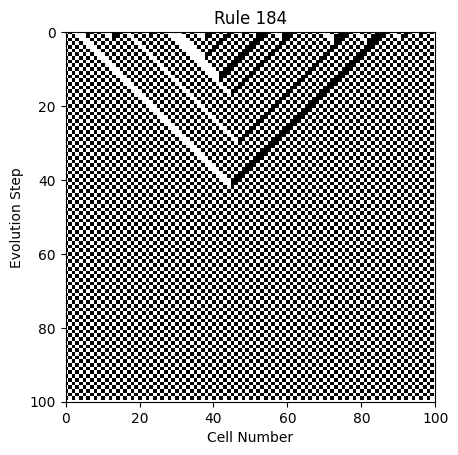

In [ ]:
# fig, axes = plt.subplots(3, 3, figsize=(8, 8))
# rules = [3, 18, 30,
#          90, 106, 110,
#          158, 154, 184]
# for ax, rule in zip(axes.flat, rules):
#     x = generate(rule)
#     ax.imshow(x, interpolation='none',
#               cmap=plt.cm.binary)
#     ax.set_axis_off()
#     ax.set_title(str(rule))


# which rule to use
rule = 184  # try also 110
cell_array_size = 100
nbr_evolve_steps = 100
initial_state = np.zeros(cell_array_size)
initial_state = np.random.rand(cell_array_size) < .5  # random initial state
# initial_state[99]= 1  # just a single cell as starting state (comment above)
x = generate(rule, initial_state, cell_array_size, nbr_evolve_steps)

# We plot the particle's trajectory.
fig, ax = plt.subplots()
ax.imshow(x, interpolation='none', cmap=plt.cm.binary)
ax.set(xlabel='Cell Number', ylabel='Evolution Step', title="Rule "+str(rule))
ax.set_xlim(0, cell_array_size)
ax.set_ylim(nbr_evolve_steps, 0)
# fig.savefig("cellular_automata-"+str(rule)+".png")  # you can save the figure if you wish

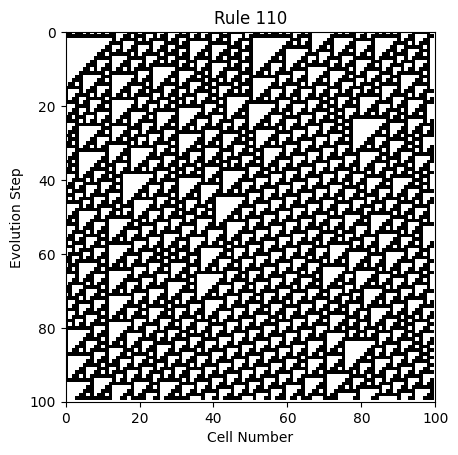

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

u = np.array([[4], [2], [1]]) # vector to represent binary 3 bits

def step(x, rule_b):
    """Compute a single step of an elementary cellular    automaton."""
    # The columns contain the L, C, and R values
    # of all cells.
    y = np.vstack((np.roll(x, 1), x,
                   np.roll(x, -1))).astype(np.int8)  # shift array elements, then stack them vertically
    # We get the LCR pattern numbers between 0 and 7.
    z = np.sum(y * u, axis=0).astype(np.int8)
    # We get the patterns given by the rule.
    return rule_b[7 - z]

def generate(rule, initial_state, size, steps):
    """Simulate an elementary cellular automaton given    its rule (number between 0 and 255)."""
    # Compute the binary representation of the rule.
    rule_b = np.array(
        [int(_) for _ in np.binary_repr(rule, 8)],
        dtype=np.int8)
    x = np.zeros((steps, size), dtype=np.int8)
    # Random initial state.
    x[0, :] = initial_state    # Apply the step function iteratively.
    for i in range(steps - 1):
        x[i + 1, :] = step(x[i, :], rule_b)
    return x

rule = 110  # try also 110
cell_array_size = 100
nbr_evolve_steps = 100
initial_state = np.zeros(cell_array_size)
initial_state = np.random.rand(cell_array_size) < .5  # random initial state# initial_state[99]= 1  # just a single cell as starting state (comment above)
x = generate(rule, initial_state, cell_array_size, nbr_evolve_steps)
# We plot the particle's trajectory.
fig, ax = plt.subplots()
ax.imshow(x, interpolation='none', cmap=plt.cm.binary)
ax.set(xlabel='Cell Number', ylabel='Evolution Step', title="Rule "+str(rule))
ax.set_xlim(0, cell_array_size)
ax.set_ylim(nbr_evolve_steps, 0)
plt.show()
# fig.savefig("cellular_automata-"+str(rule)+".png")  # you can save the figure if you wish

A special case of note is [Rule 110](https://en.wikipedia.org/wiki/Rule_110), which has the perhaps surprising property that it is [Turing complete](https://en.wikipedia.org/wiki/Turing_completeness), and hence capable of universal computation! **You should run it to see what it looks like.**

Another famous automaton with this property is **[Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life)** which is a two-dimensional cellular automaton. You can even [code it yourself](https://realpython.com/conway-game-of-life-python/) if you wish (as a hobby). People even built an entire [digital processor that can run Tetris game](https://codegolf.stackexchange.com/questions/11880/build-a-working-game-of-tetris-in-conways-game-of-life) out of this!

## Question: FSM Mini Project

In this project, you will choose **one** simple problem and implement an FSM that solves it. Specifically,

1. Briefly describe the problem.
2. Implement the FSM(s) using the automaton library (used in the example above).
3. Visualise the FSM(s).
4. Test it with multiple input strings.

Here are possible problems to work on:
* A Lift Controller as [described here.](https://www.electronics-tutorial.net/finite-state-machines/FSM-Applications/Lift-Controller/)
* [UART](https://en.wikipedia.org/wiki/Universal_asynchronous_receiver-transmitter) serial [communication protocol](https://docs.arduino.cc/learn/communication/uart/).
* Any other simple problem you are interested in and that can be modelled using FSMs.



**Answer as text here**

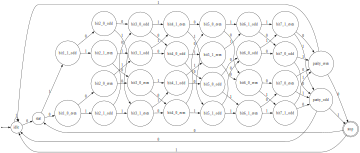

In [6]:
''' Answer as code here '''
from automata.fa.nfa import NFA

# UART serial communication protocol
# Moore FSM
UART_NFA = NFA(
    states={"idle", "start", 
            "bit1_0_even", "bit2_0_even", "bit3_0_even", "bit4_0_even", "bit5_0_even", "bit6_0_even", "bit7_0_even",
            "bit2_1_even", "bit3_1_even", "bit4_1_even", "bit5_1_even", "bit6_1_even", "bit7_1_even", "parity_even", 
            "bit2_0_odd", "bit3_0_odd", "bit4_0_odd", "bit5_0_odd", "bit6_0_odd", "bit7_0_odd", "parity_odd", 
            "bit1_1_odd", "bit2_1_odd", "bit3_1_odd", "bit4_1_odd", "bit5_1_odd", "bit6_1_odd", "bit7_1_odd", 
            "stop"},
    input_symbols={"0", "1"},
    transitions={
        "idle" : {"0" : {"start"}, "1" : {"idle"}},
        "start" : {"0" : {"bit1_0_even"}, "1" : {"bit1_1_odd"}},
        "bit1_0_even" : {"0" : {"bit2_0_even"}, "1" : {"bit2_1_odd"}},
        "bit2_0_even" : {"0" : {"bit3_0_even"}, "1" : {"bit3_1_odd"}},
        "bit3_0_even" : {"0" : {"bit4_0_even"}, "1" : {"bit4_1_odd"}},
        "bit4_0_even" : {"0" : {"bit5_0_even"}, "1" : {"bit5_1_odd"}},
        "bit5_0_even" : {"0" : {"bit6_0_even"}, "1" : {"bit6_1_odd"}},
        "bit6_0_even" : {"0" : {"bit7_0_even"}, "1" : {"bit7_1_odd"}},
        "bit7_0_even" : {"0" : {"parity_even"}, "1" : {"parity_odd"}},
        "bit2_1_even" : {"0" : {"bit3_0_even"}, "1" : {"bit3_1_odd"}},
        "bit3_1_even" : {"0" : {"bit4_0_even"}, "1" : {"bit4_1_odd"}},
        "bit4_1_even" : {"0" : {"bit5_0_even"}, "1" : {"bit5_1_odd"}},
        "bit5_1_even" : {"0" : {"bit6_0_even"}, "1" : {"bit6_1_odd"}},
        "bit6_1_even" : {"0" : {"bit7_0_even"}, "1" : {"bit7_1_odd"}},
        "bit7_1_even" : {"0" : {"parity_even"}, "1" : {"parity_odd"}},
        "parity_even" : {"0" : {"stop"}, "1" : {"idle"}},
        "bit2_0_odd" : {"0" : {"bit3_0_odd"}, "1" : {"bit3_1_even"}},
        "bit3_0_odd" : {"0" : {"bit4_0_odd"}, "1" : {"bit4_1_even"}},
        "bit4_0_odd" : {"0" : {"bit5_0_odd"}, "1" : {"bit5_1_even"}},
        "bit5_0_odd" : {"0" : {"bit6_0_odd"}, "1" : {"bit6_1_even"}},
        "bit6_0_odd" : {"0" : {"bit7_0_odd"}, "1" : {"bit7_1_even"}},
        "bit7_0_odd" : {"0" : {"parity_odd"}, "1" : {"parity_even"}},
        "parity_odd" : {"0" : {"idle"}, "1" : {"stop"}},
        "bit1_1_odd" : {"0" : {"bit2_0_odd"}, "1" : {"bit2_1_even"}},
        "bit2_1_odd" : {"0" : {"bit3_0_odd"}, "1" : {"bit3_1_even"}},
        "bit3_1_odd" : {"0" : {"bit4_0_odd"}, "1" : {"bit4_1_even"}},
        "bit4_1_odd" : {"0" : {"bit5_0_odd"}, "1" : {"bit5_1_even"}},
        "bit5_1_odd" : {"0" : {"bit6_0_odd"}, "1" : {"bit6_1_even"}},
        "bit6_1_odd" : {"0" : {"bit7_0_odd"}, "1" : {"bit7_1_even"}},
        "bit7_1_odd" : {"0" : {"parity_odd"}, "1" : {"parity_even"}},
        "stop" : {"0" : {"start"}, "1" : {"idle"}}
    },
    initial_state="idle",
    final_states={"stop"}
)

UART_NFA.show_diagram(fig_size={5})

In [17]:
# a helper function that takes in an automaton and input strings, printing whether the input was accepted or rejected
def read_user_input(my_automaton, input_sequence):
    if my_automaton.accepts_input(input_sequence):
        print("Accepted")
    else:
        print("Rejected")

read_user_input(UART_NFA, "11110000000000")
read_user_input(UART_NFA, "110001110000")

Accepted
Rejected


FSM for a lift controller using DFA

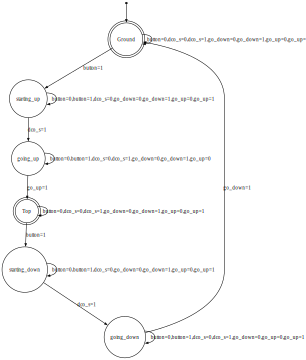

In [5]:
from automata.fa.dfa import DFA
# DFA which simulates the lift controller
# DFA simulating an elevator (lift) controller
my_dfa = DFA(
    # Define all possible states of the elevator
    states={'Ground', 'starting_up', 'going_up', 'Top', 'starting_down', 'going_down'},

    # Define valid input symbols (button presses and sensor signals)
    input_symbols={'button=0', 'button=1', 'dco_s=0', 'dco_s=1', 'go_up=0', 'go_up=1', 'go_down=0', 'go_down=1'},

    # Define state transitions based on inputs
    transitions={
        # Elevator is at Ground level
        'Ground': {
            'button=0': 'Ground',      # No button press, stay at Ground
            'button=1': 'starting_up', # Press button, start moving up
            'dco_s=0': 'Ground',
            'dco_s=1': 'Ground',
            'go_up=0': 'Ground',
            'go_up=1': 'Ground',
            'go_down=0': 'Ground',
            'go_down=1': 'Ground'
        },
        # Elevator is starting to move up
        'starting_up': {
            'button=0': 'starting_up',
            'button=1': 'starting_up',
            'dco_s=0': 'starting_up', # Doors are closed but still stationary
            'dco_s=1': 'going_up',    # Doors closed and ready to move up
            'go_up=0': 'starting_up',
            'go_up=1': 'starting_up',
            'go_down=0': 'starting_up',
            'go_down=1': 'starting_up'
        },
        # Elevator is moving up
        'going_up': {
            'button=0': 'going_up',
            'button=1': 'going_up',
            'dco_s=0': 'going_up',
            'dco_s=1': 'going_up',
            'go_up=0': 'going_up',
            'go_up=1': 'Top',  # Reached the top
            'go_down=0': 'going_up',
            'go_down=1': 'going_up'
        },
        # Elevator reached the Top floor
        'Top': {
            'button=0': 'Top',        # No button press, stay at Top
            'button=1': 'starting_down', # Press button, start moving down
            'dco_s=0': 'Top',
            'dco_s=1': 'Top',
            'go_up=0': 'Top',
            'go_up=1': 'Top',
            'go_down=0': 'Top',
            'go_down=1': 'Top'
        },
        # Elevator is starting to move down
        'starting_down': {
            'button=0': 'starting_down',
            'button=1': 'starting_down',
            'dco_s=0': 'starting_down',
            'dco_s=1': 'going_down',  # Doors closed, ready to move down
            'go_up=0': 'starting_down',
            'go_up=1': 'starting_down',
            'go_down=0': 'starting_down',
            'go_down=1': 'starting_down'
        },
        # Elevator is moving down
        'going_down': {
            'button=0': 'going_down',
            'button=1': 'going_down',
            'dco_s=0': 'going_down',
            'dco_s=1': 'going_down',
            'go_up=0': 'going_down',
            'go_up=1': 'going_down',
            'go_down=0': 'going_down',
            'go_down=1': 'Ground' # Reached Ground floor
        }
    },
    # Initial state when the elevator starts
    initial_state='Ground',

    # Final states where the elevator stops (Ground or Top)
    final_states={'Ground', 'Top'}
)

# Helper function to simulate the lift controller
def read_user_input(my_automaton, input_sequence):
    if my_automaton.accepts_input(input_sequence):
        print(f"'{input_sequence}' is Accepted")
    else:
        print(f"'{input_sequence}' is Rejected")

# show the FSM graph
#for show it clearly, set the graph to veritcal, font size to 10 and arrow size to 0.5
my_dfa.show_diagram(horizontal = False, font_size = 10.0, arrow_size = 0.5, fig_size={5})

In [19]:
#check the squence is accepted or not
read_user_input(my_dfa, ['button=1', 'dco_s=1', 'go_up=1', 'button=1', 'dco_s=1', 'go_down=1'])
read_user_input(my_dfa, ['button=1', 'dco_s=1', 'go_up=1', 'button=0'])
read_user_input(my_dfa, ['button=1', 'dco_s=1', 'go_up=1', 'button=1'])

'['button=1', 'dco_s=1', 'go_up=1', 'button=1', 'dco_s=1', 'go_down=1']' is Accepted
'['button=1', 'dco_s=1', 'go_up=1', 'button=0']' is Accepted
'['button=1', 'dco_s=1', 'go_up=1', 'button=1']' is Rejected


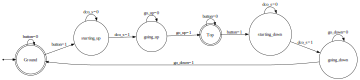

In [4]:
# another way using NFA to plot the FSM graph
# this way, inputs shown in the graph for transition are simplied, only focused on the inputs which make state changing
from automata.fa.nfa import NFA

# NFA which simulates the lift controller
my_nfa = NFA(
    states={'Ground', 'starting_up', 'going_up', 'Top', 'starting_down', 'going_down'},
    input_symbols={'button=0', 'button=1', 'dco_s=0', 'dco_s=1', 'go_up=0', 'go_up=1', 'go_down=0', 'go_down=1'},
    transitions={
        'Ground': {
            'button=0': {'Ground'},
            'button=1': {'starting_up'}
        },
        'starting_up': {
            'dco_s=0': {'starting_up'},
            'dco_s=1': {'going_up'}
        },
        'going_up': {
            'go_up=0': {'going_up'},
            'go_up=1': {'Top'}
        },
        'Top': {
            'button=0': {'Top'},
            'button=1': {'starting_down'}
        },
        'starting_down': {
            'dco_s=0': {'starting_down'},
            'dco_s=1': {'going_down'}
        },
        'going_down': {
            'go_down=0': {'going_down'},
            'go_down=1': {'Ground'}
        }
    },
    initial_state='Ground',
    final_states={'Ground','Top'}
)

# Helper function to simulate the lift controller

def read_user_input(my_automaton, input_sequence):
    if my_automaton.accepts_input(input_sequence):
        print(f"'{input_sequence}' is Accepted")
    else:
        print(f"'{input_sequence}' is Rejected")

my_nfa.show_diagram(fig_size={5})

## Turing Machines

A [Turing machine](https://en.wikipedia.org/wiki/Turing_machine) is a mathematical model of computation describing an abstract machine. Although the simple machine described ``only" manipulates symbols on a strip of tape according to a table of rules, it is capable of implementing any computer algorithm (not easy but possible). 

Since the Turing machine is essentially a mathematical model, it is not practical at all. Still, people have developed [various implementations](https://github.com/scottgriv/python-turing_machine?tab=readme-ov-file) that [visualise it.](https://turingmachine.io)

# Workshop Assessment Instructions

_You should complete the workshop tasks and answer the questions within the allocated session!_ **Submission deadline is usually the end of the last week of the workshop. Please check Canvas for the exact deadline!**

It is **mandatory to follow all of the submission guidelines** given below. _Don't forget the Report submission information on top of this notebook!_

1. The completed Jupyter Notebook and its PDF version (you can simply print-preview and then print as PDF from within your browser) should be uploaded to the right place in Canvas. _It is your responsibility to follow the announcements!_ **Late submissions will be penalised (up to 100% of the total mark depending on the delay amount)!**
2. Filename should be “ELEN90088 Workshop **W: StudentID1-StudentID2** of session **Day-Time**", where **W** refers to the workshop number, **StudentID1-StudentID2** are your student numbers, **Day-Time** is your session day and time, e.g. *Tue-14*.
3. Answers to questions, simulation results and diagrams should be included in the Jupyter Notebook as text, code, and plots. *If you don't know latex, you can write formulas/text to a paper by hand, scan it and then include it as an image within Markdown cells.*
4. Please submit your report as a group.

## Workshop Marking 

* Each workshop has a fixed number of points corresponding to a certain percentage of the total subject mark inclusive individual oral examination. You can find the detailed rubrics on Canvas.
* Individual oral quizzes will be scheduled within the next two weeks following the report submission. They will be during workshop hours. Therefore, you must attend the workshops!
* The individual oral examination will assess your answers to workshop questions, what you have done in that workshop, and your knowledge of the subject material in association with the workshop.
 
## Additional guidelines for your programs: 

* Write modular code using functions. 
* Properly indent your code. But Python forces you to do that anyway ;)
* Heavily comment on the code to describe your implementation and to show your understanding. No comments, no credit!
* Make the code your own! It is encouraged to find and get inspired by online examples but you should exactly understand, modify as needed, and explain your code via comments. If you resort to blind copy/paste, you will certainly not do well in the individual oral quizzes.